# Using ``controlSBML``

**TO DO**
* bode plots and pole/zeros

## Preliminaries

In [1]:
import controlSBML.control_sbml as ctl
import pandas as pd

import control
import numpy as np
import pandas as pd

# Constructing ControlSBML

In [2]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml")

In [3]:
# Print the first few lines of the antimony representation of this model
print(ctlsb.antimony[:380])

// Created by libAntimony v2.12.0
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Henri_Michaelis_Menten__irreversible(substrate, Km, V)
  V*substrate/(Km + substrate);
end

Henri_Michaelis_Menten__irreversible is "Henri-Michaelis-Menten (irreversible)"

function HMM_Mod(V, s, m, Km)
  V*s*m/(Km + s);
end


In [4]:
ctlsb.species_names

['IR',
 'pIR',
 'IRS',
 'pIRS',
 'iIRS',
 'Akt',
 'pAkt',
 'mTORC1',
 'pmTORC1',
 'mTORC2',
 'pmTORC2',
 'imTORC2',
 'mTORC1_DEPTOR',
 'mTORC2_DEPTOR',
 'DEPTOR',
 'pDEPTOR']

In [5]:
ctlsb.jacobian

,IR,pIR,IRS,pIRS,iIRS,Akt,pAkt,mTORC1,pmTORC1,mTORC2,pmTORC2,imTORC2,mTORC1_DEPTOR,mTORC2_DEPTOR,DEPTOR,pDEPTOR
IR,-0.004518,0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
pIR,0.004518,-0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
IRS,0.000000,-0.066667,0.0,0.020000,0.02,0.0,0.000000,0.00,-0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
pIRS,0.000000,0.066667,0.0,-0.020000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
iIRS,0.000000,0.000000,0.0,0.000000,-0.02,0.0,0.000000,0.00,0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
Akt,0.000000,0.000000,0.0,-0.046729,0.00,0.0,0.058824,0.00,0.000000,0.00,-1.442308,0.0,0.000,0.000,0.00,0.000000
pAkt,0.000000,0.000000,0.0,0.046729,0.00,0.0,-0.058824,0.00,0.000000,0.00,1.442308,0.0,0.000,0.000,0.00,0.000000
mTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,-0.099206,-0.35,5.999848,0.00,0.000000,0.0,0.006,0.000,-0.25,0.000000
pmTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.099206,0.00,-5.999848,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
mTORC2,0.000000,-0.166667,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,-2.45,0.428571,0.0,0.000,0.006,-1.40,0.000000


# Linearizing an SBML Model

In [6]:
# Create a state space representation of the model using the Jacobian at time 1. The A matrix of the sys object is the Jacobian.
ctlsb.setTime(1)
sys = ctlsb.makeStateSpace()
pd.DataFrame(sys.A)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.00454,0.028026,0.000000e+00,0.000000,0.00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
1,0.00454,-0.028026,0.000000e+00,0.000000,0.00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
2,0.00000,-0.066664,-7.541108e-05,0.019991,0.02,0.000000,0.000000,0.000000e+00,-0.066664,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
3,0.00000,0.066664,7.539203e-05,-0.019991,0.00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
4,0.00000,0.000000,1.904712e-08,0.000000,-0.02,0.000000,0.000000,0.000000e+00,0.066664,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
5,0.00000,0.000000,0.000000e+00,-0.046729,0.00,-0.000008,0.058797,0.000000e+00,0.000000,0.000000,-1.442303,0.0,0.000,0.000,0.000000e+00,0.000000
6,0.00000,0.000000,0.000000e+00,0.046729,0.00,0.000008,-0.058797,0.000000e+00,0.000000,0.000000,1.442303,0.0,0.000,0.000,0.000000e+00,0.000000
7,0.00000,0.000000,0.000000e+00,0.000000,0.00,0.000000,-0.099019,-1.467335e-01,5.998972,0.000000,0.000000,0.0,0.006,0.000,-2.018396e-01,0.000000
8,0.00000,0.000000,0.000000e+00,0.000000,0.00,0.000000,0.099019,3.691504e-08,-5.998972,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
9,0.00000,-0.065718,0.000000e+00,0.000000,0.00,0.000000,0.000000,0.000000e+00,0.000000,-1.027522,0.426983,0.0,0.000,0.006,-3.141695e-01,0.000000


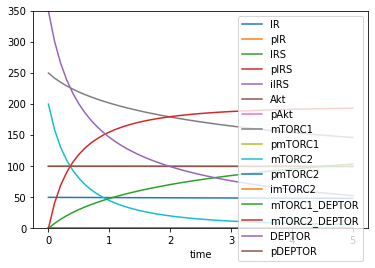

In [7]:
# Plot roadrunner simulation, with better placement of the legend.
ctlsb.plotTrueModel()

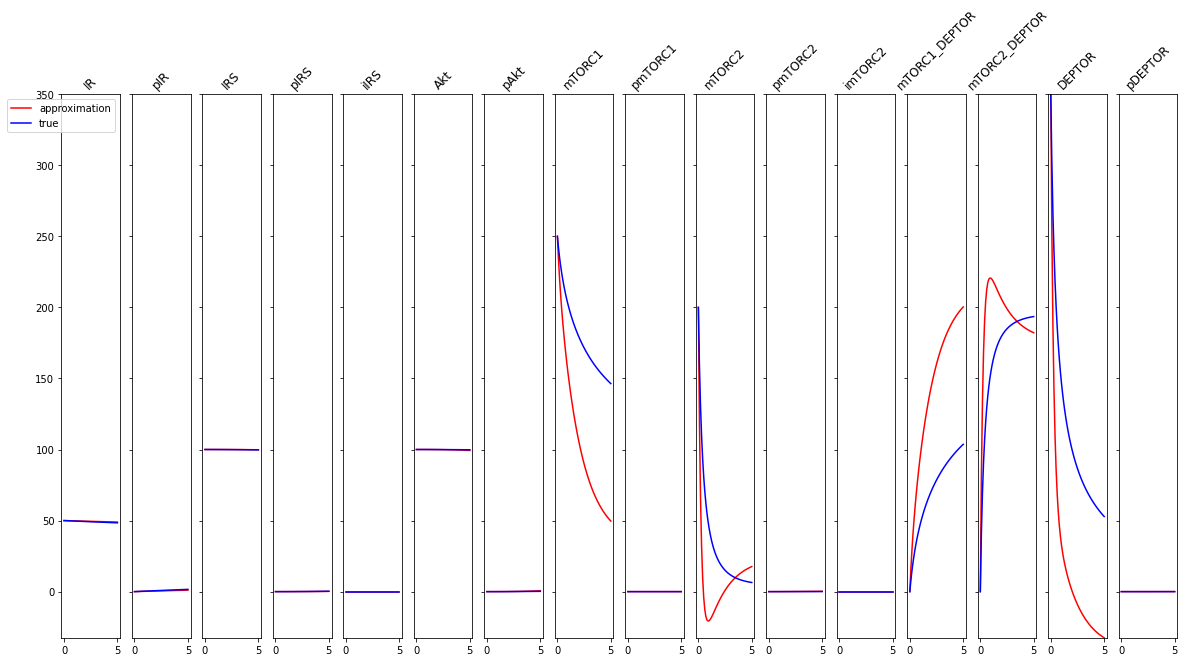

In [8]:
# Compare the linear approximation using the Jacobian at time 0 with the true model
ctlsb.setTime(1)
ctlsb.plotLinearApproximation(figsize=(20, 10))

In [9]:
# Analysis of Jacobian

In [10]:
# There are no conserved moieties
ctlsb.roadrunner.getNumConservedMoieties()

0

In [11]:
# However the reduced Jacobian is singular
np.linalg.det(ctlsb.roadrunner.getReducedJacobian())

0.0

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(ctlsb.roadrunner.getReducedJacobian())
eigenvalues

array([ 0.00000000e+00, -2.00000000e-02,  0.00000000e+00, -6.00000000e+00,
       -3.96034236e+00, -5.71428571e-01, -5.01657638e-01, -5.88235294e-02,
       -2.00000000e-02, -4.28571429e-01, -3.30898590e-02, -4.39186404e-10,
       -2.05664198e-13,  2.06455164e-13,  1.01249129e-18,  0.00000000e+00])

There are three eigenvalues at zero, and several eigenvalues very close to zero.

In [13]:
U, S, V = np.linalg.svd(ctlsb.roadrunner.getReducedJacobian())
pd.DataFrame(S)

,0
0,8.501612e+00
1,4.986613e+00
2,2.133740e+00
3,7.828530e-01
4,5.196563e-01
5,2.273017e-01
6,3.812921e-02
7,2.187205e-02
8,7.005112e-03
9,7.810599e-10


# Networks With Conserved Moieties

In [36]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000447.2?filename=BIOMD0000000447_url.xml",
                       include_boundary_species=False)
len(ctlsb.jacobian)

13

In [37]:
np.shape(ctlsb.roadrunner.getReducedJacobian())

(13, 13)

In [38]:
ctlsb.reduced_jacobian

,species_1,species_2,species_3,species_4,species_5,species_6,species_7,species_8,species_9,species_10,species_11,species_12,species_13
species_1,-0.017535,0.000000,-0.000105,-0.0042,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000
species_2,0.000035,-0.175000,0.000105,0.0042,0.0000,0.0000,0.0000,0.00000,0.3745,0.0000,0.0105,0.0000,0.0000
species_3,0.000000,-0.000350,-0.052500,0.0000,0.0000,0.0000,0.0000,-0.00007,0.0000,0.0000,0.0000,0.0000,0.0035
species_4,0.000000,0.000350,0.000000,-0.0525,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0035,0.0000
species_5,0.000000,-0.000035,0.000000,0.0000,-0.0225,0.0000,-0.0245,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000
species_6,0.000000,0.000035,0.000000,0.0000,0.0050,-0.2275,0.0245,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000
species_7,0.000000,0.000000,0.000000,0.0000,0.0000,0.3500,-0.0420,0.00000,0.0245,0.0000,0.0000,0.0000,0.0000
species_8,0.000000,0.000000,0.000000,0.0000,0.0000,1.0500,0.0000,-0.01757,0.0000,0.0000,0.0000,0.0035,0.0035
species_9,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.00000,-24.8920,0.0000,0.0000,0.0000,0.0000
species_10,0.000000,-0.122500,0.000000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,-0.0175,0.0105,0.0000,0.0000


In [39]:
np.linalg.det(ctlsb.reduced_jacobian)

-3.82404046032173e-17

In [26]:
ctlsb.setTime(3)
ctlsb.reduced_jacobian

,c
c,-0.0016


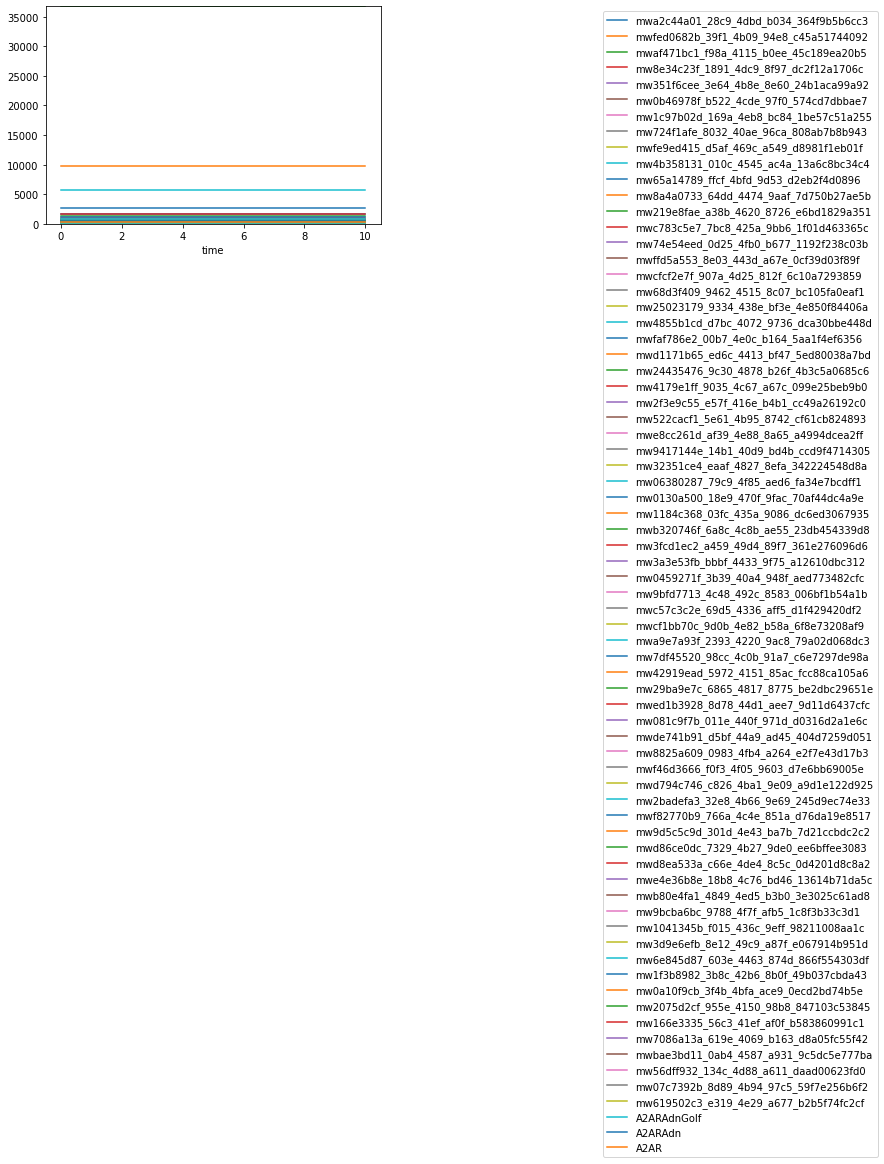

In [32]:
ctlsb.plotTrueModel(end_time=10, legend_crd=(2.5, 1))

# Frequency Analysis

In [ ]:
ctlsb.roadrunner.getNumConservedMoieties()

In [ ]:
np.shape(ctlsb.roadrunner.getReducedJacobian())

In [ ]:
np.linalg.det(sys.A)

In [ ]:
# Create a fully controllable and fully observable system
ide_mat = np.identity(len(sys.A))
sys = ctlsb.makeStateSpace(B_mat=ide_mat, C_mat=ide_mat, D_mat=ide_mat)


In [ ]:
# Bode plot for the system
#mag, phase, om = control.bode(sys, plot=True)
sys.freqresp(0) 
#plt.show(block=False)